In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Style des graphiques
sns.set(style='darkgrid')
df = pd.read_csv("train.csv")
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [13]:
#Aperçu des données
df.info()
df.describe()
#Counts the number of missing values in each column.
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
#Nettoyage des donnée
# Remplir les âges manquants par la médiane
df['Age'] = df['Age'].fillna(df['Age'].median())

# Supprimer la colonne 'Cabin' (trop de valeurs manquantes 687)
df.drop(columns=['Cabin'], inplace=True)

# Supprimer les lignes avec Embarquement manquant(car on a juste 2 valeure manquant on les suprimme au lieud de les remplir)
df.dropna(subset=['Embarked'], inplace=True)

# Vérification des valeurs manquantes
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

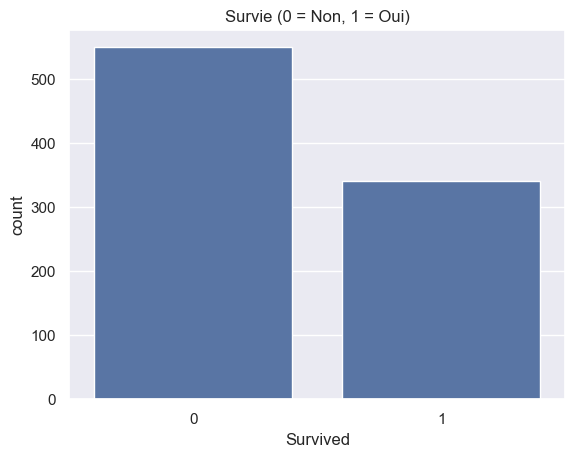

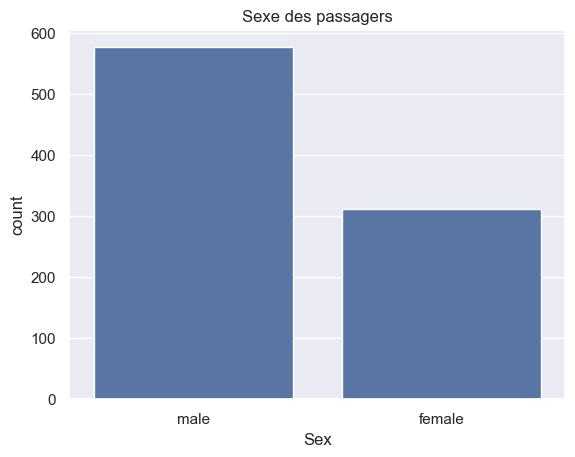

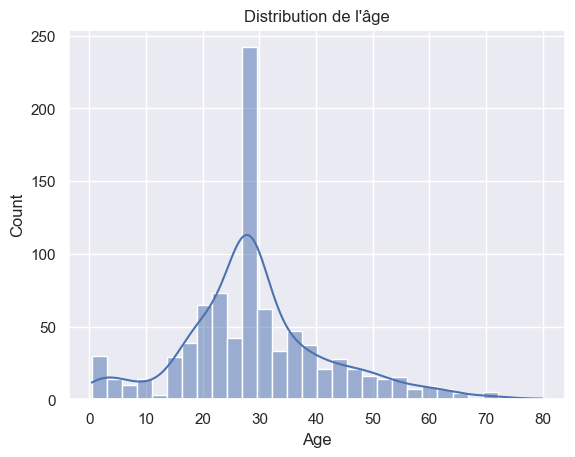

In [15]:
#Visualisations Univariées
# Répartition des survivants
sns.countplot(x='Survived', data=df)
plt.title("Survie (0 = Non, 1 = Oui)")
plt.show()

# Répartition par sexe
sns.countplot(x='Sex', data=df)
plt.title("Sexe des passagers")
plt.show()

# Âge
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Distribution de l'âge")
plt.show()


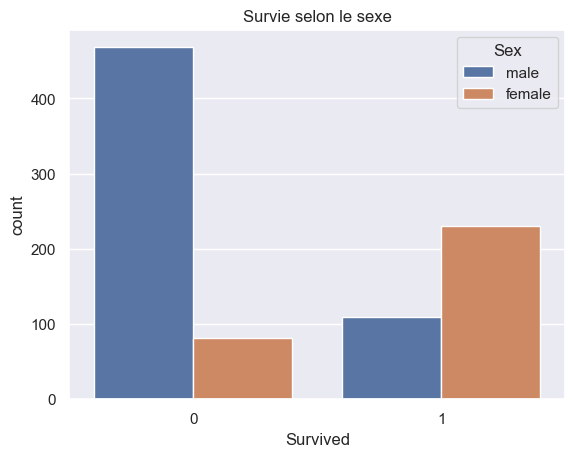

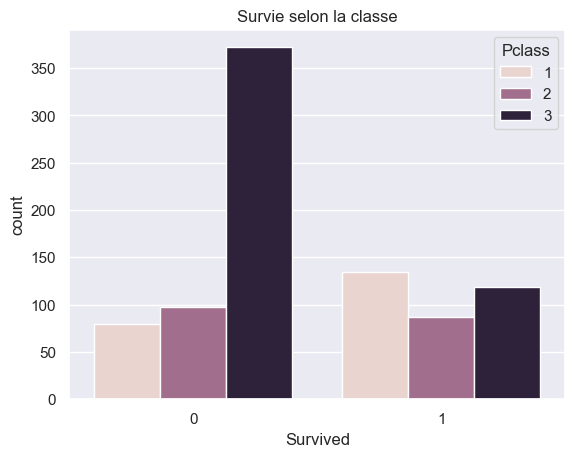

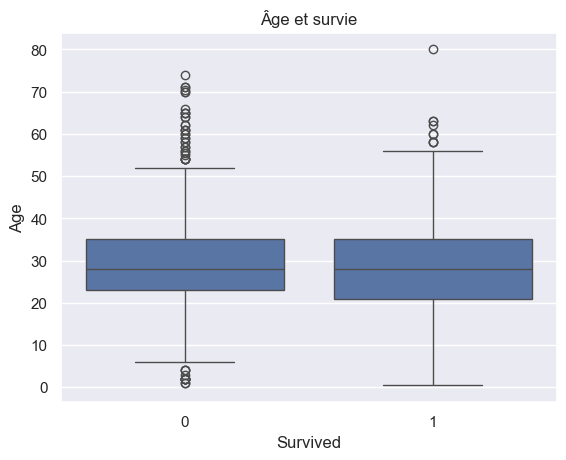

In [16]:
# Visualisations Bivariées
# Survie selon le sexe
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survie selon le sexe")
plt.show()

# Survie selon la classe
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survie selon la classe")
plt.show()

# Age vs Survie
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Âge et survie")
plt.show()


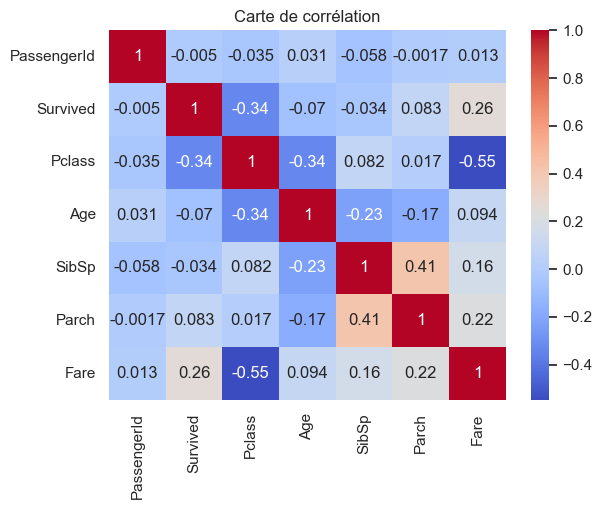

In [17]:
#Corrélation entre variables numériques
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Carte de corrélation")
plt.show()

In [18]:
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
df_encoded.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True


Accuracy : 0.7808988764044944

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.81       109
           1       0.69      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.78      0.78       178



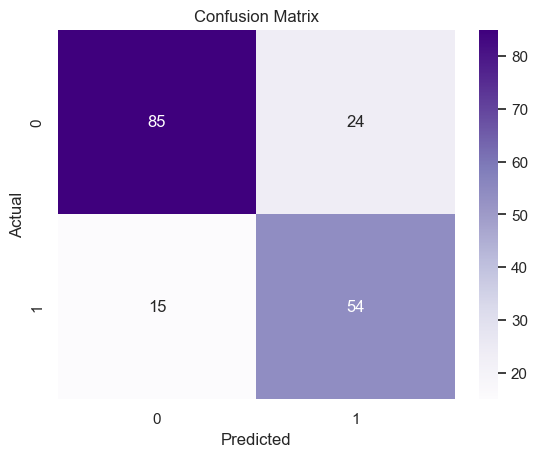

In [19]:
# 🧠 Modélisation et prédiction après EDA (données déjà nettoyées)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 🔄 Utiliser ton DataFrame déjà nettoyé, par exemple :
# df_clean = ton DataFrame avec Age rempli, Cabin supprimé, etc.
df_model = df.copy()  # si df est déjà nettoyé dans ton notebook

# 🧹 Préparer pour la modélisation
df_model.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)
df_model = pd.get_dummies(df_model, columns=['Sex', 'Embarked'], drop_first=True)

# 🎯 Séparer features et cible
X = df_model.drop('Survived', axis=1)
y = df_model['Survived']

# 🔀 Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📈 Modèle
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 📊 Prédiction
y_pred = model.predict(X_test)

# ✅ Évaluation
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
